# Finding Contours

### Import resources and display image

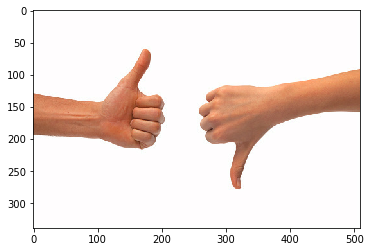

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/thumbs_up_down.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Produce a binary image for finding contours

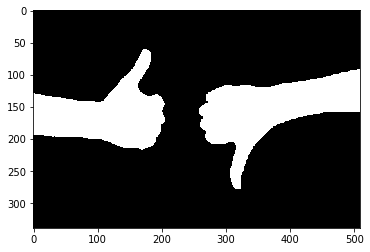

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')


### Find and draw the contours

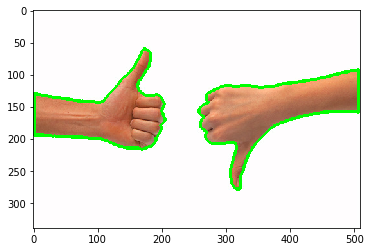

In [3]:
# Find contours from thresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

## Contour Features

Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in [OpenCV documentation, here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html).

In the next cell, you'll be asked to identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down!

### Orientation

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the `angle` from that shape.
 
```python
# Fit an ellipse to a contour and extract the angle from that ellipse
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
```

**Orientation values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

### Find the orientation of each contour

In [23]:
## Complete this function so that 
## it returns the orientations of a list of contours
## The list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """    
    # Create an empty list to store the angles in
    angles = []
        
    # Itterate over contours and find angles
    for c in contours:
        (_,_), (_,_), angle = cv2.fitEllipse(c)
        angles.append(angle)
    
    return angles

# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.274147033691406, 84.45772552490234]


### Bounding Rectangle

In the next cell, you'll be asked to find the bounding rectangle around the *left* hand contour, which has its thumb up, then use that bounding rectangle to crop the image and better focus on that one hand!

```python
# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(selected_contour)

# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
```

And to crop the image, select the correct width and height of the image to include.

```python
# Crop using the dimensions of the bounding rectangle (x, y, w, h)
cropped_image = image[y: y + h, x: x + w] 
```

### Crop the image around a contour

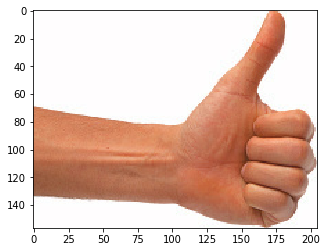

In [31]:
# This function returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    ## Crop the image using the dimensions of the bounding rectangle

    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    # Crop using the dimensions of the bounding rectangle (x, y, w, h)
    cropped_image = image[y: y + h, x: x + w] 
    
    return cropped_image


## Select the left hand contour from the list

for i in range(len(angles)):
    if angles[i] > 75:
        selected_contour = contours[i]


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)

### Draw bounding box

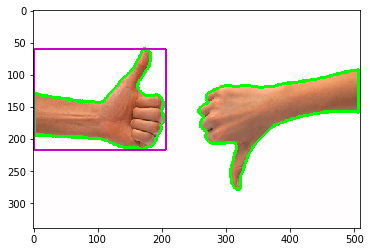

In [32]:
# This function returns a image with bounding box around the contour of the left hand
def left_hand_box(image, selected_contour):
    """
    Left hand bounding box
    :param image: the original image
    :param selectec_contour: the contour the bounding box is drawn around
    :return: box_image, image with bounding box drawn around the left hand
    """
    
    # Find the bounding rectangle of a selected contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    ## Draw the bounding box using the dimensions of the bounding rectangle

    # Make a copy of the image
    box_image = np.copy(image)
    
    # Draw the bounding rectangle as a purple box
    box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
    
    return box_image


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the box function with that contour passed in as a parameter
    box_image = left_hand_box(image, selected_contour)
    plt.imshow(box_image)